https://www.cell.com/cms/10.1016/j.cell.2011.10.047/attachment/117b6d14-799a-4f63-ac31-d40a323ddefa/mmc1.pdf


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# parameters:
alpha = 3 # Pmax
beta = 5 # Omax
gamma = 5 # Nmax
h1 = 6 # N repression of P strength
h2 = 2 # O repression of P strength
h3 = 5 # N repression of O strength
h4 = 1 # O rep of N str
h5 = 1 # P rep of N str
k1 = 1 # P degradation
k2 = 1 # O deg
k3 = 1 # N deg

# XcritY is the critical value of X for which y is half maximal
OcritP = 1
NcritP = 1
OcritN = 1
NcritO = 1
PcritN = 1
n = 1 # Hill coef of G on O
m = 1 # Hill coef of G on N

P0 = 3 # starting value for P
O0 = 0 # starting value for O
N0 = 0 # starting value for N

In [11]:
# ODEs:

def dP(N,O,P,G):
    Nfrac = (N/NcritP)**h1
    Ofrac = (O/OcritP)**h2
    denom = 1 + Nfrac + Ofrac
    frac = alpha/denom
    return(frac-k1*P)

def dO(N,O,P,G):
    Gterm = (beta*G)/(1+G)
    Nfrac = (N/NcritO)**h3
    frac = 1/(1+Nfrac)
    return(Gterm*frac-k2*O)

def dN(N,O,P,G):
    Gterm = (gamma*G)/(1+G)
    Ofrac = (O/OcritN)**h4
    Pfrac = (P/PcritN)**h5
    frac = 1/(1+Ofrac+Pfrac)
    return(Gterm*frac - k3*N)

In [25]:
t = 20
h = 0.01
n = int(t/h)

N = N0
O = O0
P = P0
G = 5 # level used in Briscoe Paper

ts = np.linspace(0,t,n)
Ns = np.zeros(n)
Os = np.zeros(n)
Ps = np.zeros(n)
Ns[0] = N0
Os[0] = O0
Ps[0] = P0
for i in range(1,n):
    N = N + h*dN(N,O,P,G)
    O = O + h*dO(N,O,P,G)
    P = P + h*dP(N,O,P,G)  
    Ns[i] = N
    Os[i] = O
    Ps[i] = P

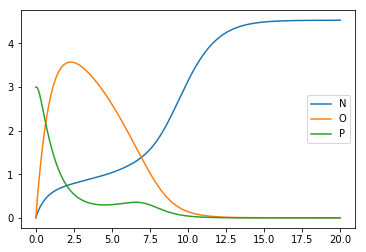

In [24]:
plt.plot(ts,Ns, label="N")
plt.plot(ts,Os, label="O")
plt.plot(ts,Ps, label="P")
plt.legend()
plt.show()